In [1]:
import os 
import sys

sys.path.append('../util')

import ML_MJO_util as mjo 
import contribution_util as ctr 

import numpy as np
import xarray as xr 

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Preturb one channel

### std calculated after ReLU

In [ ]:
# perturb the channels and see RMSD
lead_list = [15,]
fn_list = np.arange(192)
exp_list = np.arange(1,11)

rmsd_list = ctr.get_rmsd_parallel(lead_list=lead_list, fn_list=fn_list, exp_num_list=exp_list, zero_channel=False, ptb_channel=True, after_relu=True)  # rmsd_list[lead, exp, channel]

rmsd_ptb = np.empty((len(exp_list),len(fn_list)))

for i in range(len(exp_list)):
    for j in range(len(fn_list)):
        rmsd_ptb[i,j] = rmsd_list[(15,exp_list[i],fn_list[j])]  # (exp, channel)
rmsd_ptb_avg = np.mean(rmsd_ptb, axis=0)

order_ptb = np.argsort(-rmsd_ptb_avg)
rmsd_ptb_sorted = rmsd_ptb_avg[order_ptb]

order_ptb_n = np.argsort(-rmsd_ptb, axis=1)
rmsd_ptb_sorted_n = np.empty(rmsd_ptb.shape)
for i in range(len(exp_list)):
    rmsd_ptb_sorted_n[i,:] = rmsd_ptb[i,order_ptb_n[i,:]]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(rmsd_ptb_sorted, 'o-')
# ax.plot(rmsd_ptb_sorted_n.T, 'k-', linewidth=0.1)
plt.xlabel('Channel')
plt.ylabel('Averaged difference of RMM')
plt.title('Preturb one channel (std after ReLU)')

In [ ]:
print(order_ptb[:10])

In [ ]:
[175, 143, 189, 166, 167, 140, 182, 191, 180, 168]

In [ ]:
print(order_ptb_n[:,:10])

### std calculated before ReLU

In [ ]:
# perturb the channels and see RMSD
lead_list = [15,]
fn_list = np.arange(192)
exp_list = np.arange(1,11)

rmsd_list = ctr.get_rmsd_parallel(lead_list=lead_list, fn_list=fn_list, exp_num_list=exp_list, zero_channel=False, ptb_channel=True, )  # rmsd_list[lead, exp, channel]

In [ ]:
rmsd_ptb = np.empty((len(exp_list),len(fn_list)))

for i in range(len(exp_list)):
    for j in range(len(fn_list)):
        rmsd_ptb[i,j] = rmsd_list[(15,exp_list[i],fn_list[j])]  # (exp, channel)


In [ ]:
rmsd_ptb_avg = np.mean(rmsd_ptb, axis=0)
rmsd_ptb_avg.shape 

In [ ]:
order_ptb = np.argsort(-rmsd_ptb_avg)
rmsd_ptb_sorted = rmsd_ptb_avg[order_ptb]

In [ ]:
order_ptb_n = np.argsort(-rmsd_ptb, axis=1)
rmsd_ptb_sorted_n = np.empty(rmsd_ptb.shape)
for i in range(len(exp_list)):
    rmsd_ptb_sorted_n[i,:] = rmsd_ptb[i,order_ptb_n[i,:]]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(rmsd_ptb_sorted, 'o-')
ax.plot(rmsd_ptb_sorted_n.T, 'k-', linewidth=0.1)
plt.xlabel('Channel')
plt.ylabel('Averaged difference of RMM')
plt.title('Preturb one channel')

In [ ]:
print(order_ptb[:10]) 

In [ ]:
print(order_ptb_n[:,:10])

In [ ]:
print(order_ptb[:60])

In [ ]:
lead_list = np.arange(15,20,5)
fn_list=list(np.arange(0,192))
rmsd_list = ctr.get_rmsd_parallel(lead_list=lead_list,fn_list=fn_list, zero_channel=True, ptb_channel=False)

In [ ]:
rmsd_zero = np.empty((len(lead_list),len(fn_list)))

for i in range(len(lead_list)):
    for j in range(len(fn_list)):
        rmsd_zero[i,j] = rmsd_list[(lead_list[i],'',fn_list[j])]



In [ ]:
rmsd_zero_sorted, order_zero = ctr.resort_descending(np.squeeze(rmsd_zero))


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(rmsd_zero_sorted, 'o-')

plt.xlabel('Channel')
plt.ylabel('Averaged difference of RMM')
plt.title('Zero one channel')

In [ ]:
order_zero[:10]

In [ ]:
order_zero[:80]

In [ ]:
order_ptb

In [ ]:
order_zero

# Fourier transform on selected channels.

In [ ]:
import pickle 
lat_lim = 20
mjo_ind = 'RMM' 
lead = 15
m = 1
mflg = 'off' 
wnx = 1 
wnxflg = 'off'
zmode = 1
nmem = 1 
dataflg = ''
vn = 'olr'

flag = vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(lead)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+dataflg

with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/outfields'+flag+'.pickle', 'rb') as file2:
    outfields = pickle.load(file2)


time, batch, channel, lat, lon = np.shape(outfields['input_map'])
feature_maps = np.reshape(outfields['input_map'], (time*batch, channel, lat, lon))


In [ ]:
# channel_sel = np.asarray([143, 175, 166, 171, 155, 140, 134, 167, 182, 151, 189, 191, 180, 168,])
channel_sel = order_zero[:80]
freq, power, power_norm = ctr.get_fft_power(order=channel_sel)
freq0, power0, power_norm0 = ctr.get_fft_power_input()

In [ ]:
data_vars = {
    'freq':(['freq'],freq),
    'channel':(['channel'],channel_sel),
    'power':(['channel','freq'],power),
    'power_norm':(['channel','freq'],power_norm),
    'power0':(['freq'],np.squeeze(power0)),
    'power_norm0':(['freq'],np.squeeze(power_norm0))
}

In [ ]:
ds = xr.Dataset(data_vars)
ds.to_netcdf('./scale_change/fft_hid26_rmsd_top80_zero_channel.nc')

In [ ]:
# channel_sel = np.asarray([143, 175, 166, 171, 155, 140, 134, 167, 182, 151, 189, 191, 180, 168,])
channel_sel = order_ptb[:80]
freq, power, power_norm = ctr.get_fft_power(order=channel_sel)
# freq0, power0, power_norm0 = ctr.get_fft_power_input()

In [ ]:
data_vars = {
    'freq':(['freq'],freq),
    'channel':(['channel'],channel_sel),
    'power':(['channel','freq'],power),
    'power_norm':(['channel','freq'],power_norm),
    'power0':(['freq'],np.squeeze(power0)),
    'power_norm0':(['freq'],np.squeeze(power_norm0))
}
ds = xr.Dataset(data_vars)
ds.to_netcdf('./scale_change/fft_hid26_rmsd_top80_ptb_channel.nc')

In [2]:
# fn = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/hidden_layer_analysis/scale_change/fft_hid26_rmsd_20deg_zero_channel.nc'
# fn = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/hidden_layer_analysis/scale_change/fft_hid26_rmsd_20deg_ptb_channel.nc'
fn = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/hidden_layer_analysis/scale_change/fft_hid26_rmsd_20deg_zero_channel_beforerelu.nc'
# fn = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/hidden_layer_analysis/scale_change/fft_hid26_rmsd_20deg_ptb_channel_beforerelu.nc'
# fn = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/hidden_layer_analysis/scale_change/fft_hid26_rmsd_10deg_zero_channel.nc'
# fn = '/global/homes/l/linyaoly/ERA5/script/Unet4MJO/hidden_layer_analysis/scale_change/fft_hid26_rmsd_10deg_ptb_channel.nc'

ds = xr.open_dataset(fn)    
power = ds['power'].values
power_norm = ds['power_norm'].values
power0 = ds['power0'].values
power_norm0 = ds['power_norm0'].values
freq = ds['freq'].values
order = ds['channel'].values

In [ ]:
print(order[:10])

In [ ]:
kmax = 90
plt.plot(freq[:kmax], np.log10(power_norm[:10,:kmax]).T,'r-', linewidth=0.3)
# plt.plot(freq[:kmax], np.log10(power_norm[10:,:kmax]).T,'b-', linewidth=0.3)
plt.plot(freq[:kmax], np.mean(np.log10(power_norm[:10, :kmax]), axis=0),'r-', linewidth=2)
plt.plot(freq[:kmax], np.log10(power_norm0[:kmax]),'k-', linewidth=2)
plt.xlabel('wave number')
plt.ylabel('log10(norm power)')
plt.text(0.95, 0.95, 'black: input', color='black', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.90, 'red: top 10 channels', color='red', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
# plt.text(0.95, 0.85, 'blue: rest channels (zeroing)', color='red', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')


In [ ]:
# kmax = 90
# plt.plot(freq[:kmax], np.log10(power_norm[10:55,:kmax]).T,'b-', linewidth=0.3)
# plt.plot(freq[:kmax], np.log10(power_norm[55:80,:kmax]).T,'r-', linewidth=0.3)
# plt.plot(freq[:kmax], np.log10(power_norm[80:,:kmax]).T,'g-', linewidth=0.3)
plt.plot(freq[:kmax], np.mean(np.log10(power_norm[10:55,:kmax]),axis=0),'b-', linewidth=2)
plt.plot(freq[:kmax], np.mean(np.log10(power_norm[55:80,:kmax]),axis=0),'r-', linewidth=2)
plt.plot(freq[:kmax], np.mean(np.log10(power_norm[80:,:kmax]),axis=0),'g-', linewidth=2)
plt.plot(freq[:kmax], np.log10(power_norm0[:kmax]),'k-', linewidth=2)
plt.xlabel('wave number')
plt.ylabel('log10(norm power)')
plt.text(0.95, 0.95, 'black: input', color='black', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.90, 'blue: 10-55', color='blue', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, 'red: 56-80', color='red', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.80, 'red: rest', color='green', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')


In [ ]:
kmax = 90
# plt.plot(freq[:kmax], np.log10(power_norm[10:60,:kmax]).T,'b-', linewidth=0.3)
# plt.plot(freq[:kmax], np.log10(power_norm[60:,:kmax]).T,'r-', linewidth=0.3)
plt.plot(freq[:kmax], np.mean(np.log10(power_norm[10:60,:kmax]),axis=0),'b-', linewidth=2)
plt.plot(freq[:kmax], np.mean(np.log10(power_norm[60:,:kmax]),axis=0),'r-', linewidth=2)
plt.plot(freq[:kmax], np.log10(power_norm0[:kmax]),'k-', linewidth=2)
plt.xlabel('wave number')
plt.ylabel('log10(norm power)')
plt.text(0.95, 0.95, 'black: input', color='black', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.90, 'blue: 10-60', color='blue', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, 'red: rest', color='red', fontsize=12, transform=plt.gca().transAxes, ha='right', va='top')


In [ ]:
lat_avg = 10 
latitude = np.arange(20,-22,-2)
lat_ind = np.where((latitude>=-lat_avg) & (latitude<=lat_avg))[0]

list(lat_ind) 

In [ ]:
latitude[lat_ind]

In [ ]:
exp_list = np.arange(1,11)
fn_list = np.arange(192)

bcc_list, rmse_list = mjo.get_1var_skill_parallel('RMM', lead_list=[15,], exp_num_list=exp_list, fn_list=fn_list, zero_channel=False, ptb_channel=True)

bcc = np.empty((len(exp_list),len(fn_list)))
rmse = np.empty((len(exp_list),len(fn_list)))

for i in range(len(exp_list)):
    for j in range(len(fn_list)):
        bcc[i,j] = bcc_list[(15,exp_list[i],fn_list[j])]
        rmse[i,j] = rmse_list[(15,exp_list[i],fn_list[j])]

In [ ]:
bcc_avg = np.mean(bcc, axis=0)
plt.plot(bcc_avg)

In [ ]:
order = np.argsort(-bcc_avg)
bcc_sorted = bcc_avg[order]
print(order[-30:])
plt.plot(bcc_sorted[:],'o-')

In [11]:
lead_list = np.arange(0,20,5)

bcc_list, rmse_list = mjo.get_1var_skill_parallel('RMM', lead_list, exp_num_list=[''], m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, outputflg='', lat_range=20, zero_channel=False)
bcc0 = np.empty((len(lead_list)))
rmse0 = np.empty((len(lead_list)))

for i in range(len(lead_list)):
    bcc0[i] = bcc_list[(lead_list[i],'')]
    rmse0[i] = rmse_list[(lead_list[i],'')]

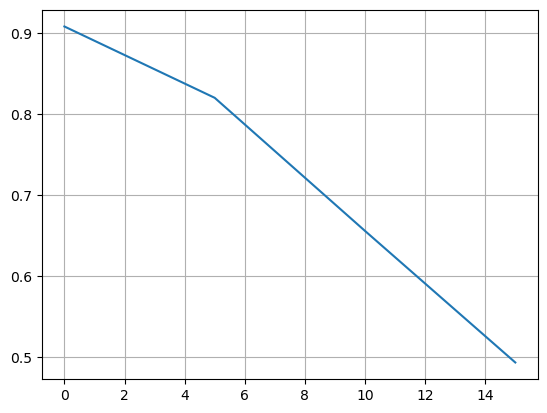

In [12]:
plt.plot(lead_list, bcc0)
plt.grid()

In [7]:
lead_list = np.arange(0,20,5)
fn_list=list(np.arange(0,192))
bcc_list, rmse_list = mjo.get_1var_skill_parallel('RMM', lead_list, exp_num_list=[''], m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, outputflg='', lat_range=20, fn_list=fn_list)


In [8]:
bcc1 = np.empty((len(lead_list), len(fn_list)))
rmse1 = np.empty((len(lead_list), len(fn_list)))

for i in range(len(lead_list)):
    for j in range(len(fn_list)):
        bcc1[i,j] = bcc_list[(lead_list[i],'',j)]
        rmse1[i,j] = rmse_list[(lead_list[i],'',j)]

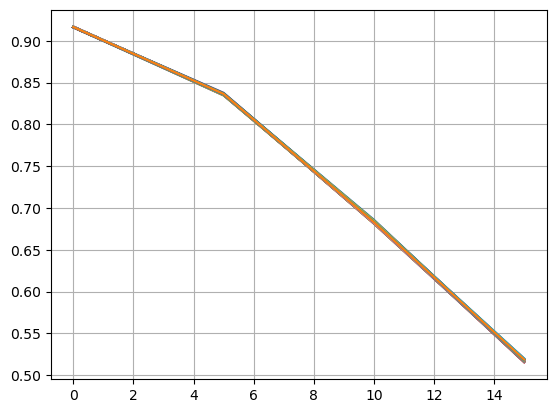

In [9]:
plt.plot(lead_list, bcc1)
plt.grid()

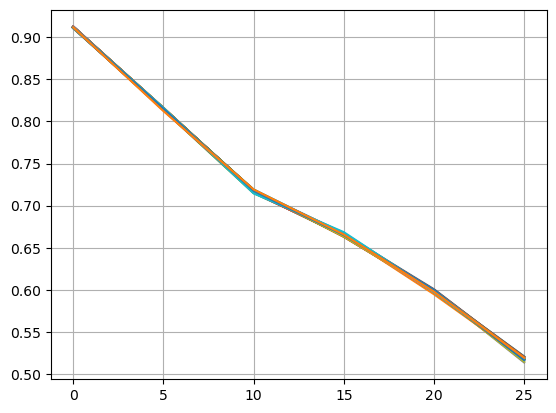

In [4]:
plt.plot(lead_list, bcc1)
plt.grid()

In [ ]:
lead_list = np.arange(0,30,5)
fn_list=None
zero_channel = True
bcc_list, rmse_list = mjo.get_1var_skill_parallel('RMM', lead_list, exp_num_list=[''], m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, outputflg='', lat_range=20, fn_list=fn_list, zero_channel=zero_channel)


In [ ]:
bcc1 = np.empty((len(lead_list), 1))
rmse1 = np.empty((len(lead_list), 1))

for i in range(len(lead_list)):
    bcc1[i] = bcc_list[(lead_list[i],'')]
    rmse1[i] = rmse_list[(lead_list[i],'')]

plt.plot(lead_list, bcc1)
plt.grid()

In [13]:
# str(channel[0]) + '_' + str(channel[-1])
lead_list = np.arange(0,35,5)
fn_list=["0_127"]
bcc2 = np.empty(len(lead_list))
rmse2 = np.empty(len(lead_list))
bcc_list, rmse_list = mjo.get_1var_skill_parallel('RMM', lead_list, exp_num_list=[''], m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, outputflg='', lat_range=20, fn_list=fn_list)
for i in range(len(lead_list)):
    bcc2[i] = bcc_list[(lead_list[i],'',fn_list[0])]
    rmse2[i] = rmse_list[(lead_list[i],'',fn_list[0])]

In [14]:
# str(channel[0]) + '_' + str(channel[-1])
lead_list = np.arange(0,35,5)
fn_list=["128_191"]
bcc = np.empty(len(lead_list))
rmse = np.empty(len(lead_list))
bcc_list, rmse_list = mjo.get_1var_skill_parallel('RMM', lead_list, exp_num_list=[''], m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, outputflg='', lat_range=20, fn_list=fn_list)
for i in range(len(lead_list)):
    bcc[i] = bcc_list[(lead_list[i],'',fn_list[0])]
    rmse[i] = rmse_list[(lead_list[i],'',fn_list[0])]

In [ ]:
bcc0, rmse0 = mjo.get_1var_skill_parallel('RMM', lead_list, exp_num_list=[''], m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, outputflg='', lat_range=20)


In [ ]:
bccref = np.empty((len(lead_list), 1))
rmseref = np.empty((len(lead_list), 1))

for i in range(len(lead_list)):
    bccref[i,0] = bcc0[(lead_list[i],'')]
    rmseref[i,0] = rmse0[(lead_list[i],'')]


In [ ]:
dbcc = np.squeeze(bcc - bccref)  # (lead,channel)
drmse = np.squeeze(rmse - rmseref)

In [ ]:
dbcc[-1,:].mean()

In [ ]:
def plot_uncertainty_all(ax, x, y, ydis, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5):
    plt.rcParams.update({'font.size': ftsize})
    ax.plot(x, y, linestyle=style, linewidth=2.5, label=label, color=line_c, alpha=alpha)
    ax.fill_between(x, np.min(ydis, axis=1), np.max(ydis, axis=1), alpha=alpha_fill, color=line_c)
    # ax.plot(x, np.ones(len(x))*thred, 'k--', linewidth=2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xticks(np.arange(0, 31, 5))
    ax.set_yticks(np.arange(ylim[0], ylim[1]+0.1, gap))
    # ax.set_xtick(np.arange(0, 31, 5))
    if title is not None:
        ax.set_title(title, pad=20)
    ax.grid(visible=True)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8.5,6.5))

lead_list = [0, 5, 10, 15, 20, 25, 30]
skill_avg = bccref
plot_uncertainty_all(ax, lead_list, skill_avg, bccref, 0.5, None, None, '19 var', line_c='tab:blue', alpha_fill=0.4)


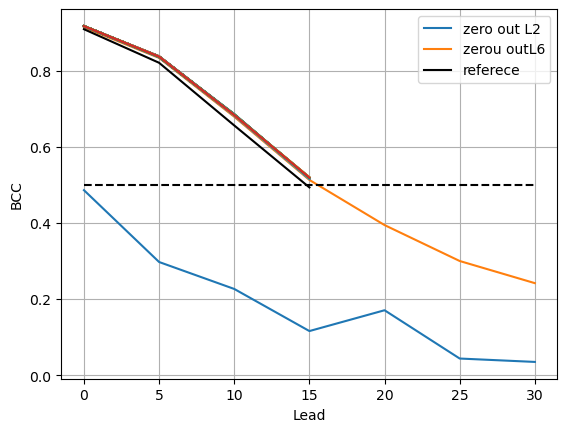

In [26]:
plt.plot(np.arange(0, np.shape(bcc)[0]*5,5), bcc, label='zero out L2')
plt.plot(np.arange(0, np.shape(bcc2)[0]*5,5),bcc2, label='zerou out L6')
plt.plot(np.arange(0, np.shape(bcc1)[0]*5,5),bcc1)
plt.plot(np.arange(0, np.shape(bcc0)[0]*5,5),bcc0, 'k', label='referece')
plt.plot([0,30],[0.5,0.5],'k--')
plt.ylabel('BCC')
plt.xlabel('Lead')
plt.legend()
plt.grid()

In [ ]:
sorted_dbcc_ind = np.argsort(-dbcc)
sorted_drmse_ind = np.argsort(-drmse)

sorted_dbcc = dbcc[sorted_dbcc_ind]
sorted_drmse = drmse[sorted_drmse_ind]

In [ ]:
plt.plot(bcc[:,0], bcc0)

In [ ]:
plt.plot(sorted_dbcc, label='BCC')

In [ ]:
plt.plot(sorted_drmse, label='RMSE')

In [ ]:
print(sorted_dbcc_ind[:30])

In [ ]:
print(sorted_drmse_ind[:30])

In [ ]:
import matplotlib.colors as colors
import pickle

# Load the dictionary from the file
vn = 'olr'
lat_lim = 20
mjo_ind = 'RMM' 
leadmjo = 15
m=1
mflg = 'off' 
wnx = 1
wnxflg = 'off'
zmode = 1
nmem = 1
dataflg = '' 
flag = vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+dataflg

with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/outfields'+vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+'.pickle', 'rb') as file2:
    outfields = pickle.load(file2)


In [ ]:
# extract the L2+L6 fields
hid26 = np.concatenate((np.reshape(np.asarray(outfields['hidden5']), (-1, 128, 21, 180)), np.reshape(np.asarray(outfields['hidden1']), (-1, 64, 21, 180))), axis=1)
hid26.shape 

In [ ]:
# look at the distribution of the most influential channel 175
h175 = np.squeeze(hid26[:,175,:,:])
# show density distribution for each grid 
# density probability of each grid; not hist
import seaborn as sns
for i in np.arange(21):
    for j in np.arange(180):
        sns.kdeplot(h175[:,i,j], color='b', linewidth=0.1)

In [ ]:
# calculate the mean value and the standard deviation at each grid point for each channel

mean_hid26 = np.mean(hid26, axis=0)
std_hid26 = np.std(hid26, axis=0)


In [ ]:
# store std_hid26 using pickle
with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/std_hid26'+vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+'.pickle', 'wb') as file3:
    pickle.dump(std_hid26, file3)


In [ ]:
hid26_relu = np.maximum(hid26, 0)

In [ ]:
hid26_relu.shape

In [ ]:
mean_hid26_relu = np.mean(hid26_relu, axis=0)
std_hid26_relu = np.std(hid26_relu, axis=0)

In [ ]:
# store std_hid26 using pickle
with open('/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_yproj_xfft_4gpus_new/hidden_analysis/std_hid26relu'+vn+str(lat_lim)+'deg_'+mjo_ind+'_ERA5_lead'+str(leadmjo)+'_dailyinput_m'+str(m)+mflg+'_wnx'+str(wnx)+wnxflg+'_zmode'+str(zmode)+'_nmem'+str(nmem)+'.pickle', 'wb') as file3:
    pickle.dump(std_hid26_relu, file3)


In [ ]:
mean_hid26.shape

In [ ]:
x = np.random.normal(loc=0, scale=1, size=(21,180))
plt.contourf(x)

In [ ]:
# density of distribution
import seaborn as sns
sns.kdeplot(x.flatten(), color='b', linewidth=0.1)

In [ ]:
order = [175, 143, 189, 166, 167, 140, 182, 191, 180, 168, 183, 171, 163,
       147, 164, 185, 155, 129, 151, 190, 181, 177, 133, 134, 131, 178,
       135, 145, 153, 165, 160, 128, 158, 130, 169, 188, 132, 161, 172,
       152, 186, 187, 170, 142, 154, 174, 149, 144, 137, 162, 148, 157,
       136, 138, 156, 179, 184, 173, 176,  85,  36, 139, 146,  17,  21,
       150,  53,  32,  42, 107,  49, 159, 123,  44, 141, 121,  80,  15,
        99, 105]

In [ ]:
# visualize the maps of the top 80 important channels
# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(mean_hid26[order[i+60], :, :])
    # relu
    # data = np.log10(np.maximum(data, 0)+1e-8)
    data = np.maximum(data, 0)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    ax.set_title('channel: '+str(order[i+60])) 

plt.show()

In [ ]:
# visualize the maps of the top 80 important channels
# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(std_hid26[order[i+30], :, :])
    # relu
    # data = np.log10(np.maximum(data, 0)+1e-8)
    data = np.maximum(data, 0)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    # ax.set_title('channel: '+str(order[i+60])) 

plt.show()

In [ ]:
# visualize the maps of the top 80 important channels
# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(std_hid26_relu[order[i], :, :])
    # relu
    # data = np.log10(np.maximum(data, 0)+1e-8)
    # data = np.maximum(data, 0)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    # ax.set_title('channel: '+str(order[i+60])) 

plt.show()

In [ ]:
# visualize the maps of the top 80 important channels
# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(std_hid26_relu[i, :, :])
    # relu
    # data = np.log10(np.maximum(data, 0)+1e-8)
    # data = np.maximum(data, 0)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    # ax.set_title('channel: '+str(order[i+60])) 

plt.show()

In [ ]:
tstep = 0

x6 = np.concatenate([np.asarray(outfields['hidden5'])[tstep, tstep, :, :, :].squeeze(), np.asarray(outfields['hidden1'])[tstep, tstep, :, :, :].squeeze()], axis=0)

x6.shape 

In [ ]:
# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(x6[order[i], :, :])
    # relu
    data = np.log10(np.maximum(data, 0)+1e-8)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    ax.set_title('channel: '+str(order[i])) 

plt.show()

# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(x6[order[i+30], :, :])
    # relu
    data = np.log10(np.maximum(data, 0)+1e-8)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    ax.set_title('channel: '+str(order[i+30])) 

plt.show()

# Create the figure with a grid of subplots
fig, axs = plt.subplots(6, 5, figsize=(40, 25), constrained_layout=True)
plt.rcParams.update({'font.size': 10})
# Plot each subplot
for i, ax in enumerate(axs.flat):
    data = np.squeeze(x6[order[i+60], :, :])
    # relu
    data = np.log10(np.maximum(data, 0)+1e-8)
    im = ax.contourf(np.arange(0,360,2), np.arange(20,-22,-2), data)
    plt.colorbar(im, ax=ax)
    ax.set_title('channel: '+str(order[i+60])) 

plt.show()

In [ ]:
data = x6[order[:30],:,:]
data.shape

In [ ]:
data_fft = np.fft.fft(data, axis=-1)

freq = np.fft.fftfreq(data.shape[-1], d=2) * 360

power = np.abs(data_fft[:,:,:])**2

norm_power = power / np.sum(power, axis=-1, keepdims=True)

plt.plot(freq[:30], np.mean(norm_power[:,:,:30], axis=1).T)

In [ ]:
data_fft[0,0,:].mean()

In [ ]:
data_fft[0,0,0]

In [ ]:
# inverse of fft
data_recon = np.fft.irfft(data_fft[0,0,:], n=180)
np.mean(data_recon)

In [ ]:
plt.plot(np.abs(data_fft[0,0,:30]))